In [239]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [269]:
def set_initial():
    qc = QuantumCircuit(4,2)
    return qc

def set_00():
    qc = QuantumCircuit(4, 2)
    qc.id(0)
    qc.id(1)
    return qc

def set_01():
    qc = QuantumCircuit(4, 2)
    qc.id(0)
    qc.x(1)
    return qc

def set_10():
    qc = QuantumCircuit(4, 2)
    qc.x(0)
    qc.id(1)
    return qc

def set_11():
    qc = QuantumCircuit(4, 2)
    qc.x(0)
    qc.x(1)
    return qc

def set_input_qubits(a=None, b=None, two_qubits=None):
    two_qubits = str(a) + str(b) if a is not None and b is not None else two_qubits
    mappping_two_qubits = {
        '00': set_00,
        '01': set_01,
        '10': set_10,
        '11': set_11
    }
    return mappping_two_qubits[two_qubits]()

def set_f_s(qc):
    qc.cx(0, 2)
    qc.cx(1, 2)
    return qc

# alias
set_two_cnots = set_f_s
set_xor = set_f_s

def set_f_c(qc):
    qc.ccx(0, 1, 3)
    return qc

# alias
set_toffoli = set_f_c
set_and = set_f_c

def set_measure_on_i_and_save_in_j(qc, i, j):
    qubit_index_to_be_measured = i
    classical_register_index_to_be_saved = j
    qc.measure(qubit_index_to_be_measured, classical_register_index_to_be_saved)
    return qc

def set_measure_on_s(qc):
    return set_measure_on_i_and_save_in_j(qc, 2, 0)

def set_measure_on_c(qc):
    return set_measure_on_i_and_save_in_j(qc, 3, 1)


def set_quantum_adder(qc):
    qc = set_f_s(qc)
    qc = set_f_c(qc)
    qc = set_measure_on_s(qc)
    qc = set_measure_on_c(qc)
    return qc

set_the_oracle = set_quantum_adder
set_f = set_quantum_adder

def set_job_on_simulator(qc, shots=1024):
    simulator = AerSimulator()
    job = simulator.run(qc, shots=shots)
    return job

def get_result_from_job(job):
    result = job.result()
    return result


def run_quantum_adder(a=None, b=None, two_qubits=None, shots=1024):
    qc = set_input_qubits(a, b, two_qubits)
    qc = set_f(qc)
    job = set_job_on_simulator(qc, shots)
    result = get_result_from_job(job)
    counts_sc = result.get_counts()
    if a is not None and b is not None and two_qubits is None:
        two_qubits = str(a) + str(b)
    dct = {
        'input_ab': two_qubits,
        'output_counts_sc': counts_sc,  
        'qc': qc    
    }
    return dct

def extend_counts(counts):
    output_format = list(counts.keys())[0]
    n = len(output_format)
    possible_results = [format(i, f'0{n}b') for i in range(2**n)]
    extended_counts = {result: counts.get(result, 0) for result in possible_results}
    for key, value in counts.items():
        extended_counts[key] = value
    return extended_counts

def draw_qc(qc):
    return qc.draw(output='mpl')

In [270]:
# class QuantumAdder:
#     def __init__(self, a, b):
#         self.initial = set_initial()
#         self.input = set_input_qubits(a, b)
#         self.f_s = set_f_s(self.initial)
#         self.xor = self.f_s
#         self.f_c = set_f_c(self.initial)
#         self.toffoli = self.f_c
#         self.measure_s = set_measure_on_s(self.initial)
#         self.measure_c = set_measure_on_c(self.initial)
#         self.oracle = self.set_oracle(include_input=False)
#         self.f = self.oracle
#         self.full = self.set_oracle(include_input=True)
#         self.job = set_job_on_simulator(self.full)
#         self.result = get_result_from_job(self.job)
#         self.draw =self.draw_qc()

#     def set_oracle(self, include_input):
#         if include_input:
#             qc = set_the_oracle(self.input)
#         else:
#             qc = set_the_oracle(self.initial)
#         return qc
    
#     def reset_circuit(self):
#         qc_initial = set_initial()
#         self.initial = qc_initial
#         return qc_initial

#     def draw_qc(self):
#         self.reset_circuit()
#         dct = {
#             'initial': self.initial.draw(output='mpl'),
#             'input': self.input.draw(output='mpl'),
#             'xor': self.xor.draw(output='mpl'),
#             'toffoli': self.xor.draw(output='mpl'),
#             'measure_s': self.measure_s.draw(output='mpl'),
#             'measure_c': self.measure_c.draw(output='mpl'),
#             'oracle': self.oracle.draw(output='mpl'),
#             'f': self.oracle.draw(output='mpl'),
#             'full': self.full.draw(output='mpl')
#         }
#         return dct


    # def initiate_circuit(self):
    #     qc = set_initial
    #     self.initial = qc
    #     return self.initial


In [278]:
class QuantumAdder:
    def __init__(self, a, b):
        self.a, self.b = a, b
        self.initial = self.set_initial()
        self.input = self.reset_input()
        self.f_s = self.set_f_s()
        self.f_c = self.set_f_c()
        self.measure_s = self.set_measure_s()
        self.measure_c = self.set_measure_c()
        self.oracle = self.set_oracle()
        self.full = self.set_oracle(include_input=True)
        self.draw = self.draw_qc()
        self.draw_full =self.draw_qc_full()

    def set_initial(self):
        qc_initial = set_initial()
        return qc_initial

    def reset_input(self):
        qc = set_input_qubits(self.a, self.b)
        return qc

    def set_f_s(self, include_input=False):
        qc = self.reset_input() if include_input else self.set_initial()
        qc = set_f_s(qc)
        self.xor = qc
        return qc
    
    def set_f_c(self, include_input=False):
        qc = self.reset_input() if include_input else self.set_initial()
        qc = set_f_c(qc)
        self.toffoli = qc
        return qc
    
    def set_measure_s(self, include_input=False):
        qc = self.reset_input() if include_input else self.set_initial()
        qc = set_measure_on_s(qc)
        return qc

    def set_measure_c(self, include_input=False):
        qc = self.reset_input() if include_input else self.set_initial()
        qc = set_measure_on_c(qc)
        return qc

    def set_oracle(self, include_input=False):
        qc = self.reset_input() if include_input else self.set_initial()
        qc_oracle = set_the_oracle(qc)
        self.f = qc_oracle
        return qc_oracle
    
    def draw_qc(self):
        dct = {
            'initial': draw_qc(self.initial),
            'input': draw_qc(self.input),
            'xor': draw_qc(self.xor),
            'toffoli': draw_qc(self.xor),
            'measure_s': draw_qc(self.measure_s),
            'measure_c': draw_qc(self.measure_c),
            'oracle': draw_qc(self.oracle),
            'f': draw_qc(self.oracle),
            'full': draw_qc(self.full)
        }
        return dct
    
    def draw_qc_full(self):
        output = draw_qc(self.full)
        return output

    def run(self):
        job = set_job_on_simulator(self.full)
        self.job = job
        self.result = job.result()
        self.counts = self.result.get_counts()
        return job
    
    def plot(self):
        if not hasattr(self, 'counts'):
            raise ValueError('You need to run the circuit first: self.run()')
        extended_counts = extend_counts(counts=self.counts)
        output = plot_histogram(extended_counts)
        return output
    
    

In [279]:
qa = QuantumAdder(0,1)

TypeError: QuantumAdder.set_f_s.<locals>.<lambda>() got an unexpected keyword argument 'output'

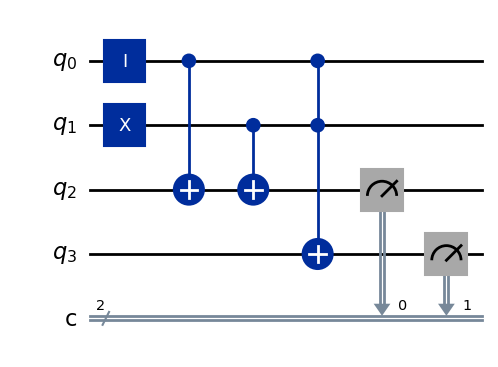

In [273]:
draw_qc(qa.f)

In [274]:
qa.run()

In [275]:
qa.result

Result(backend_name='aer_simulator', backend_version='0.15.1', qobj_id='', job_id='af3b628c-150b-4ba1-bf23-29c00a7aeb47', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=4, name='circuit-407', qreg_sizes=[['q', 4]], metadata={}), status=DONE, seed_simulator=4153516894, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 10, 'parallel_shots': 1, 'sample_measure_time': 0.000339334, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3], 'device': 'CPU', 'time_taken': 0.00147, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 16384, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'num_qubits': 4, 'method': 'statevector', 'required_memory_mb': 1, 'fusion': {'enabled': True, 'threshold': 14, 'applied': Fal

In [276]:
qa.counts

{'01': 1024}

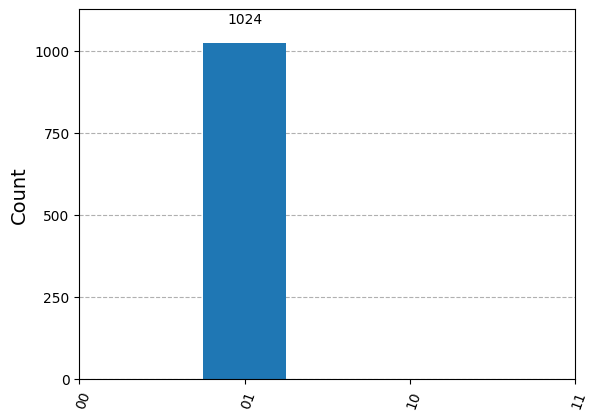

In [277]:
qa.plot()

In [263]:
output = plot_histogram(extend_counts(qa.counts))

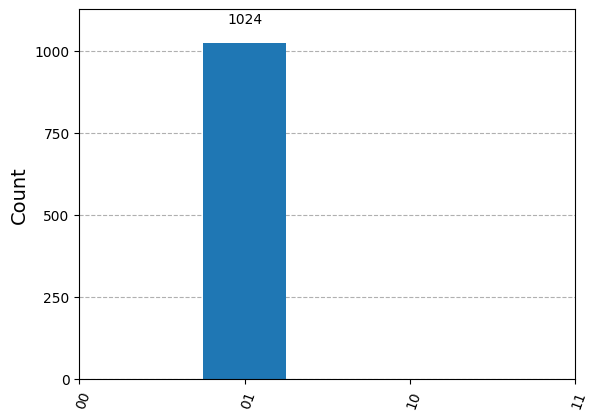

In [257]:
output

In [251]:
qa.plot()

In [238]:
qa.result.get_counts()

{'01': 1024}

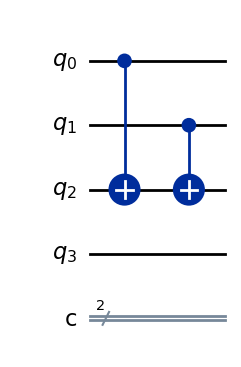

In [205]:
qa.draw['toffoli']

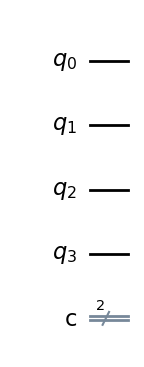

In [196]:
qa.initial.draw(output='mpl')

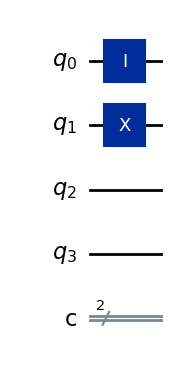

In [197]:
qa.input.draw(output='mpl')


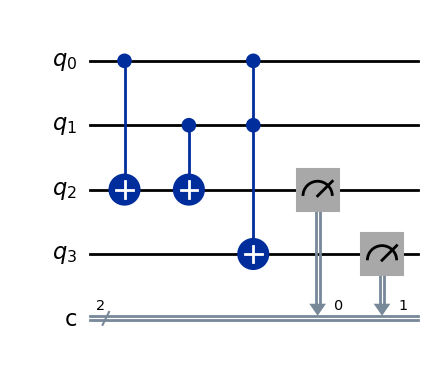

In [198]:
qa.oracle.draw(output='mpl')

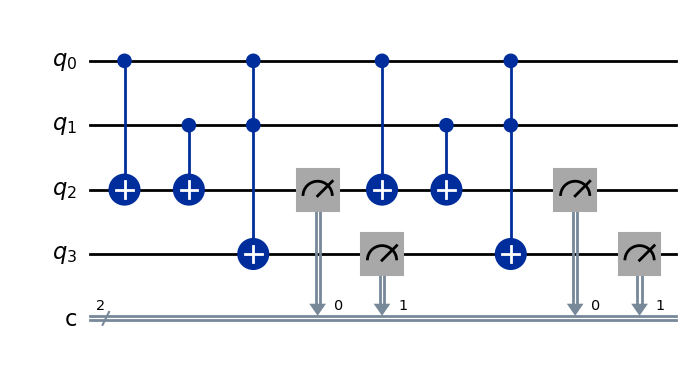

In [96]:
qa_11.draw['toffoli']

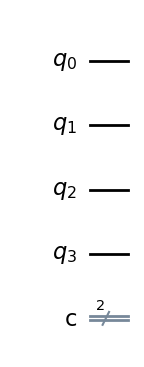

In [80]:
qa_11.reset_circuit().draw(output='mpl')

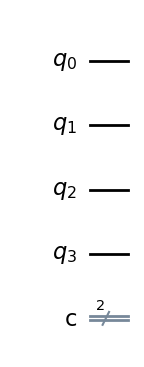

In [81]:
qa_11.initial.draw(output='mpl')

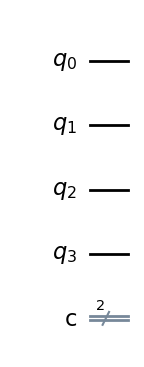

In [82]:
qa_11.draw['initial']

In [61]:
from qcrg_qiskit_problem_solver import *

In [3]:
result = run_quantum_adder(a=1, b=1)
result

{'input_ab': '11',
 'output_counts_sc': {'10': 1024},
 'qc': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x11f529a50>}

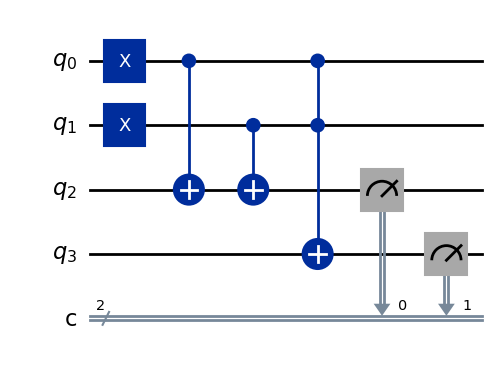

In [4]:
result['qc'].draw(output='mpl')